<a href="https://colab.research.google.com/github/127-0-0-vvk/LogisticRegressionTitanic/blob/main/LogisticRegressionTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# make sure you download the file Titanic-train.csv to your google
# drive. This code should be able to access it if it is there! Place the file at
# the top level directory of google drive
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Make sure file is listed - this code should show it 
listed = drive.ListFile({'q': "title contains 'titanic_train.csv'"}).GetList()
print ("fetching csv files...")
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

%pwd
print('listing content')
%ls /content/drive


Mounted at /content/drive
fetching csv files...
listing content
MyDrive/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267

*******confusion matrix below*******
[[145  22]
 [ 28  72]]


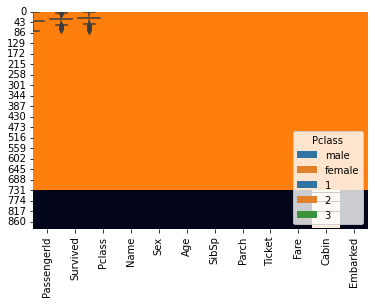

In [5]:

import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import the data set
titanic_data = pd.read_csv('/content/titanic_train.csv')
#
#Exploratory data analysis
sns.heatmap(titanic_data.isnull(), cbar=False)
sns.countplot(x='Survived', data=titanic_data)
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.hist(titanic_data['Age'].dropna())
plt.hist(titanic_data['Fare'])
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

#Imputation function
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
        
    else:
        return age

#Impute the missing Age data
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

#Reinvestigate missing data
sns.heatmap(titanic_data.isnull(), cbar=False)

#Drop null data
titanic_data.drop('Cabin', axis=1, inplace = True)
titanic_data.dropna(inplace = True)

#Create dummy variables for Sex and Embarked columns
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

#Add dummy variables to the DataFrame and drop non-numeric data
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)
titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

#Print the finalized data set
print(titanic_data.head())

#Split the data set into x and y data
y_data = titanic_data['Survived']
x_data = titanic_data.drop('Survived', axis = 1)

#Split the data set into training data and test data
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

#Train the model and create predictions
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

#Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))

#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print('*******confusion matrix below*******')
print(confusion_matrix(y_test_data, predictions))